In [14]:
import sys
import os

#Ensure Python can find the Code directory
sys.path.append(os.path.abspath(".."))

import utils

In [15]:
#Use functions and packages
df = utils.load_data()
df.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


In [16]:
#Drop duplicate rows based on the 'name' column
df_non_dup = df.drop_duplicates(subset='name')

In [17]:
df_non_dup.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0
9,10.0,marcu brown,marcu,brown,Male,21/01/1993,23,Less than 25,African-American,0,...,NaN,Risk of Recidivism,8,High,13/01/2013,Risk of Violence,6,Medium,1,0


In [18]:
#Calculate the range in values for 'age' column
print(df_non_dup['age'].max())
print(df_non_dup['age'].min())
df_non_dup['age'].max() - df_non_dup['age'].min()

96
18


78

<Axes: xlabel='age', ylabel='Count'>

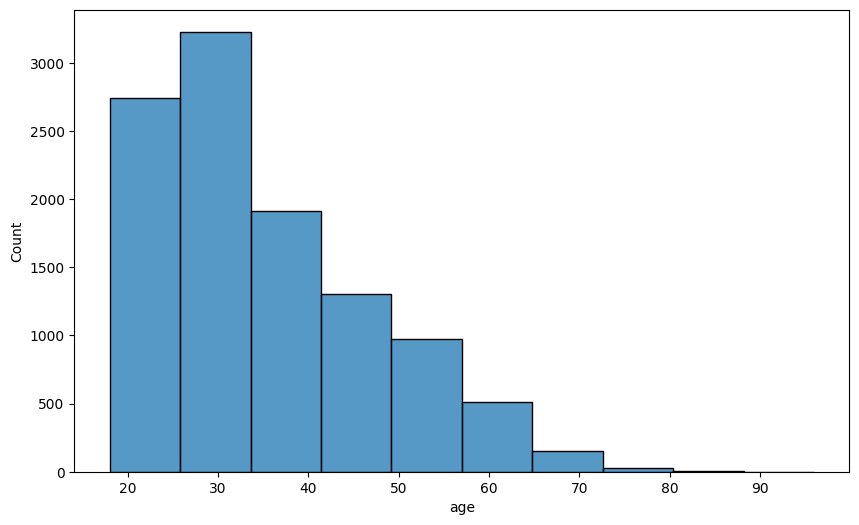

In [19]:
#Visualize the age distribution
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup['age'], bins = 10)

In [20]:
#Create a table that contains the count for each bin
age_bins = utils.pd.cut(df_non_dup['age'], bins=10)
age_bins_table = age_bins.value_counts().reset_index()
age_bins_table.sort_values('age')

,age,count
1,"(17.922, 25.8]",2740
0,"(25.8, 33.6]",3228
2,"(33.6, 41.4]",1914
3,"(41.4, 49.2]",1303
4,"(49.2, 57.0]",1075
5,"(57.0, 64.8]",408
6,"(64.8, 72.6]",155
7,"(72.6, 80.4]",29
8,"(80.4, 88.2]",2
9,"(88.2, 96.0]",1


Text(0.5, 1.0, 'Risk of Recidivism by Age')

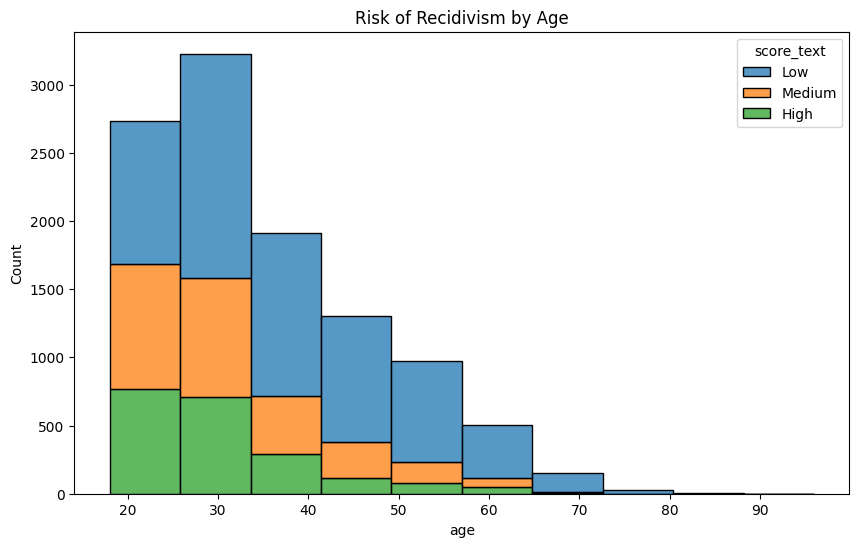

In [21]:
#Visualize the age distribution with 'score_text' as hue
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup, x='age', hue='score_text', bins=10, multiple='stack')
utils.plt.title('Risk of Recidivism by Age')

In [22]:
#Count the values of each 'score_text' for each 'age' bin
age_score_table = df_non_dup.groupby([age_bins, 'score_text'], observed=True)['name'].count().reset_index()
age_score_table.columns = ['age', 'score_text', 'count_score']
age_score_table

,age,score_text,count_score
0,"(17.922, 25.8]",High,769
1,"(17.922, 25.8]",Low,1052
2,"(17.922, 25.8]",Medium,916
3,"(25.8, 33.6]",High,713
4,"(25.8, 33.6]",Low,1647
5,"(25.8, 33.6]",Medium,867
6,"(33.6, 41.4]",High,288
7,"(33.6, 41.4]",Low,1197
8,"(33.6, 41.4]",Medium,428
9,"(41.4, 49.2]",High,117


Text(0.5, 1.0, 'Risk of Violence by Age')

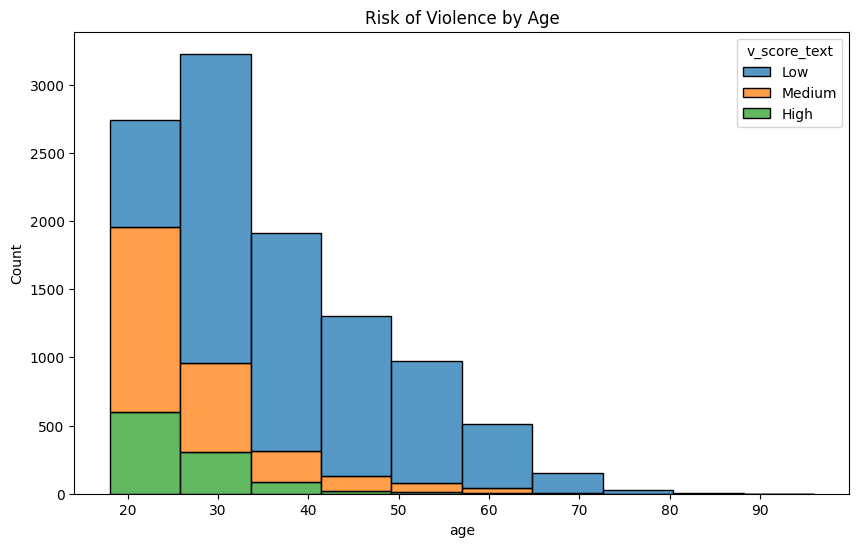

In [23]:
#Visualize the age distribution with 'v_score_text' as hue
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup, x='age', hue='v_score_text', bins=10, multiple='stack')
utils.plt.title('Risk of Violence by Age')

In [24]:
#Count the values of each 'v_score_text' for each 'age' bin
age_v_score_table = df_non_dup.groupby([age_bins, 'v_score_text'], observed=True)['name'].count().reset_index()
age_v_score_table.columns = ['age', 'v_score_text', 'count_v_score']
age_v_score_table

,age,v_score_text,count_v_score
0,"(17.922, 25.8]",High,601
1,"(17.922, 25.8]",Low,782
2,"(17.922, 25.8]",Medium,1356
3,"(25.8, 33.6]",High,304
4,"(25.8, 33.6]",Low,2266
5,"(25.8, 33.6]",Medium,657
6,"(33.6, 41.4]",High,83
7,"(33.6, 41.4]",Low,1603
8,"(33.6, 41.4]",Medium,228
9,"(41.4, 49.2]",High,19


Text(0.5, 1.0, 'Race by Age')

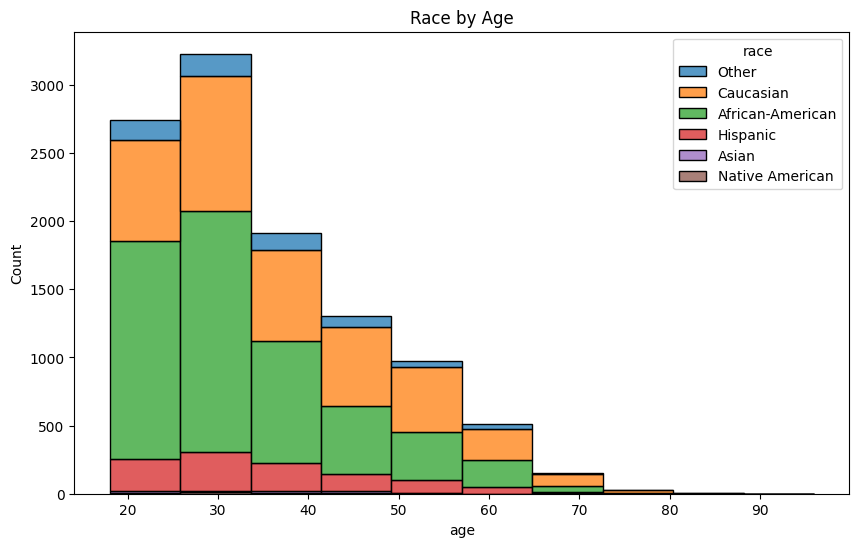

In [27]:
#Visualize the age distribution with 'race'
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup, x='age', hue='race', bins=10, multiple='stack')
utils.plt.title('Race by Age')

In [28]:
#Count the values of each 'race' for each 'age' bin
age_race_table = df_non_dup.groupby([age_bins, 'race'], observed=True)['name'].count().reset_index()
age_race_table.columns = ['age', 'race', 'count']
age_race_table

,age,race,count
0,"(17.922, 25.8]",African-American,1596
1,"(17.922, 25.8]",Asian,13
2,"(17.922, 25.8]",Caucasian,743
3,"(17.922, 25.8]",Hispanic,235
4,"(17.922, 25.8]",Native American,8
5,"(17.922, 25.8]",Other,145
6,"(25.8, 33.6]",African-American,1767
7,"(25.8, 33.6]",Asian,11
8,"(25.8, 33.6]",Caucasian,992
9,"(25.8, 33.6]",Hispanic,287
